In [21]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor
[x for x in dir(list) if not '__' in x]


['append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

   For the remainder of the semester our group will be working with a FIFA 18 COMPLETE PLAYER DATASET, that can be found on kaggle.com. The size of this dataset is approximately 17981 x 75, which includes features that range from the players name to their individual agility in the game. The dataset provides the positions played by the individual as well as their current salary from their respective club. It is also important to note that the players age and club is represented in the data. There are a few features within this dataset that we do not specifically need in order to answer our question such as their photo and team flag, which we have programmed to remove. With the time that we have worked with this dataset we realized that majority of the features are strings and need to be converted into an integer because there are some values represented as objects and we cannot use them. Along with missing data and attributes that include symbols that we will remove. Removing these feature will not specifically remove the player as a whole but just that specific attribute.This data is important to help develop the game and advance the sport of soccer. It would also be important to anyone who is responsible for paying the players because they would want to make sure they don’t overpay or miss out on a once in a lifetime player. These attributes give value to each specific player. There is a lot of importance when it comes to the success of the club as well because without good players the team won’t win. We think that this data could also be important to determine the longevity of a players career and determine if the player is really deserving of a large contract or that the club should pass on the player and select a younger player for their roster.
Working with this data set we are able to ask a few questions such as:
 What attributes have the most significance when it comes to a players salary?
Can we predict the players salary based on their position?
Relating specific attributes to an individual players salary. 
Given the players rating of … can their salary be determined?
Do certain positions pay more compared to others?	
Do certain teams pay more compared to others?
Can we predict a players’ position based on their ability rankings?
We think that initially we are going to look at our data set and try to analyze our problem as a regression type. We have discussed the ability to switch to a categorical question later on because we have a lot of data points and attributes that we could use. 


In [110]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Determining the type of data 

* This removes the Euro symbol and the M from the Value columns
* We need this for potential too
* Must consider the values that are thousands and not millons


In [111]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))


In [112]:
#fifa['Overall'] = fifa['Overall'].map(lambda x: x.strip(b"b'"))
set(fifa['Overall'].astype('float'))
set(fifa['Wage'].astype('float'))

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 105.0,
 110.0,
 115.0,
 120.0,
 125.0,
 130.0,
 135.0,
 140.0,
 145.0,
 150.0,
 155.0,
 160.0,
 165.0,
 170.0,
 175.0,
 180.0,
 185.0,
 190.0,
 195.0,
 200.0,
 205.0,
 210.0,
 215.0,
 220.0,
 225.0,
 230.0,
 235.0,
 240.0,
 250.0,
 260.0,
 265.0,
 275.0,
 280.0,
 285.0,
 295.0,
 310.0,
 325.0,
 340.0,
 355.

In [76]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,565,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,565,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,280,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,510,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,230,58,29,...,55,25,11,61,44,10,83,70,11,GK


In [ ]:
#This should drop all rows containing + from the column aggression
fifa = fifa[~fifa['Aggression'].isin(['+'])]
fifa = fifa[~fifa['Aggression'].isin(['-'])]

In [8]:
sn.pairplot(fifa)

Since majority of the features are classified as objects they we not plotted. So far there are only three feature that are integer.

In [9]:
fifa.groupby('Age').Potential.mean()

Age
16    76.538462
17    73.492248
18    72.654762
19    72.815716
20    72.717269
21    72.790047
22    72.542296
23    72.489957
24    72.090705
25    70.836399
26    70.574875
27    69.697917
28    69.304472
29    69.763604
30    69.853234
31    69.767511
32    69.468379
33    69.709887
34    68.911765
35    69.151832
36    69.080882
37    68.536232
38    68.666667
39    67.900000
40    67.625000
41    64.333333
43    55.000000
44    70.500000
47    46.000000
Name: Potential, dtype: float64

In [115]:
A = fifa.groupby('Club')['Overall'].count()
B = fifa.groupby('Club')['Potential'].count()


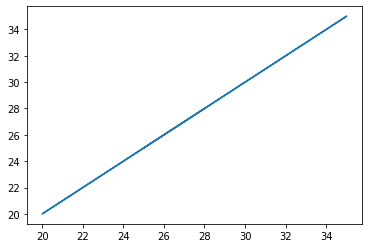

In [116]:
plt.plot(A,B)
plt.show()


### Working with the Overall vs Potential

In [117]:
X = fifa["Potential"] = fifa.Potential.astype(float)
Y = fifa["Overall"] = fifa.Overall.astype(float)


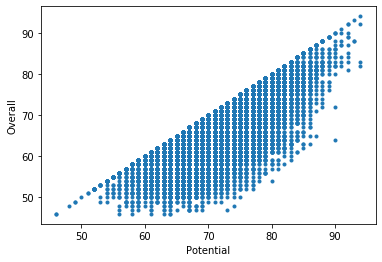

In [118]:
plt.plot(X, Y,'.')
plt.ylabel('Overall')
plt.xlabel('Potential')
plt.show()

Grouping the overall rating and portential by club.

## Linear Regression

In [ ]:
X = np.atleast_2d(np.array([float(h) for h in fifa.loc[:, 'Potential']])).transpose()
Y = np.array(fifa.loc[:, 'Overall'])

In [ ]:
n = X.shape[0]
test = int(0.20*n)            
perm = rn.permutation(n)   
X = X[perm]
Y = Y[perm]
X_test = X[:test]       
Y_test = Y[:test]
X_train = X[test:]     
Y_train = Y[test:]

In [14]:
reg = LinearRegression().fit(X_train, Y_train)
b, m = reg.intercept_, *reg.coef_
b, m

(10.260482236746249, 0.786047901531791)

In [ ]:
reg = LinearRegression().fit(X, Y)   
reg.score(X, Y)

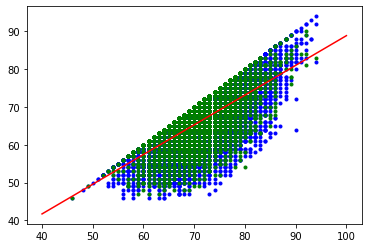

In [16]:
plt.plot(X_train, Y_train, 'b.')
plt.plot(X_test, Y_test, 'g.')
xx = np.linspace(40, 100, 50)
yy = b + m*xx
plt.plot(xx, yy, 'r-');

In [17]:
print('The training: {}'.format(reg.score(X_train, Y_train)))
print('The testing: {}'.format(reg.score(X_test, Y_test)))

The training: 0.46994548901687344
The testing: 0.45513057384028144


The training and testing are not accurate. 

## Applying Bootstraping method

In [18]:
num = 50 # number of bootstraps to use
Xboot = [0]*num
Yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  
    Xboot[k] = X[sample, :]
    Yboot[k] = Y[sample]

In [19]:
test = int(0.20*n)
R2 = pa.DataFrame( np.array([ [0]*num]*4).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])

for k in range(num):
    X_test = Xboot[k][:test]
    Y_test = Yboot[k][:test]
    X_train = Xboot[k][test:]
    Y_train = Yboot[k][test:]
    reg = LinearRegression().fit(X_train, Y_train)
    reg2 = LinearRegression().fit(X_train[:, 0:6], Y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, Y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, Y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], Y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], Y_test)
    
R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = list(range(num)) + ['Mean', 'Standard Deviation']
R2.tail(10)

,train_1,test_1,train_2,test_2
42,0.467327,0.467590,0.467327,0.467590
43,0.473155,0.465163,0.473155,0.465163
44,0.462279,0.466712,0.462279,0.466712
45,0.462464,0.453080,0.462464,0.453080
46,0.467629,0.436296,0.467629,0.436296
47,0.475843,0.465077,0.475843,0.465077
48,0.473365,0.481541,0.473365,0.481541
49,0.469686,0.427638,0.469686,0.427638
Mean,0.470572,0.457150,0.470572,0.457150
Standard Deviation,0.002789,0.009199,0.002789,0.009199


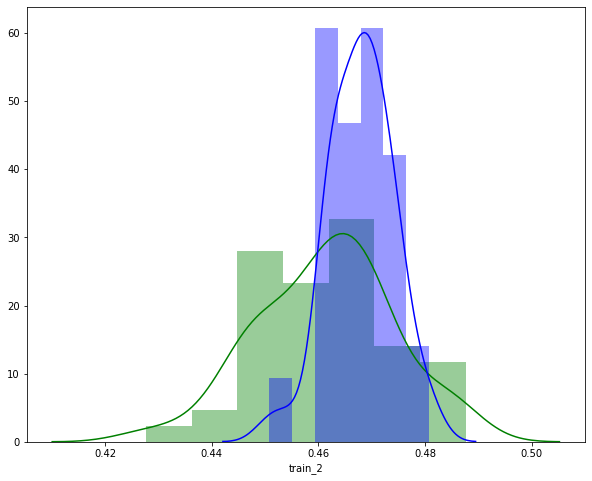

In [100]:
plt.figure(figsize = (10, 8))
sn.distplot(R2.iloc[:num, 1], color='green')
sn.distplot(R2.iloc[:num, 2], color='blue');

### PCA Method
* STILL FIGURING OUT

In [79]:
X = np.array(fifa.iloc[:, 3:5])
Y = np.array(fifa.iloc[:, 1])
print(X)
print(Y)

[[94. 94.]
 [93. 93.]
 [92. 94.]
 ...
 [46. 61.]
 [46. 64.]
 [46. 64.]]
[32 30 25 ... 17 18 18]


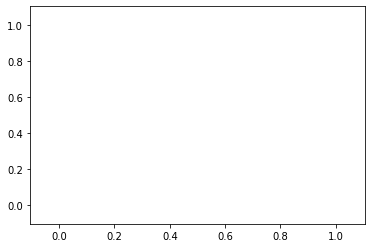

In [85]:
plt.plot(X[Y==1, 1], X[Y==1, 1], 'r.')
plt.plot(X[Y==1, 1], X[Y==1, 1], 'g.');


### K-Nearest Neighbors Application:
* Compares Overall Potential and Age
* We chose a Regressor model over a classification 

In [127]:
X = np.array(fifa[['Overall', 'Potential']])
y = np.array(fifa.iloc[:, 1])
    

In [128]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [129]:
 # Make the training and testing sets
n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [130]:
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor

In [131]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X_train, y_train, X_test, y_test):
    
    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.8232680927178687
Testing R2: 0.8237675312025134


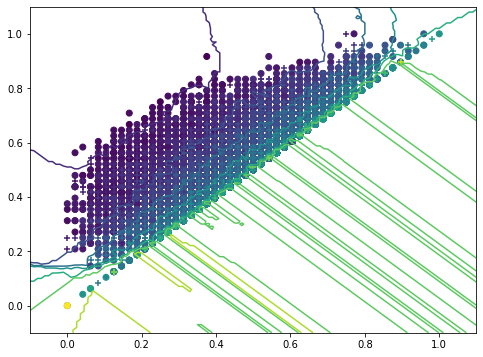

In [132]:
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

### PCA Method

In [2]:
from sklearn.decomposition import PCA
# Build a matrix of the predictors and results

X = np.array(fifa.iloc[:,3:5])
y = np.array(fifa.iloc[:, 1])

NameError: name 'np' is not defined

In [ ]:
pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

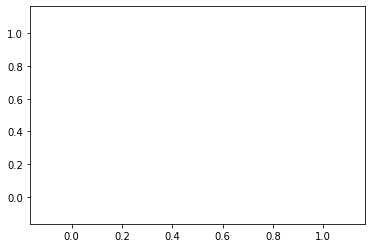

In [160]:
# We can check how the predictors do at classifying flower types by graphing individual pairs for example Sepal_Length and Sepal_Width

plt.plot(Xpca[y==0, 0], Xpca[y==0, 1], 'r.')
plt.plot(Xpca[y==1, 0], Xpca[y==1, 1], 'g.')
plt.plot(Xpca[y==2, 0], Xpca[y==2, 1], 'b.');

In [161]:
# The explained variance quantifies the propotion of the variation in the values of X that have been explained by each component

print(pca.explained_variance_ratio_)

[0.8452562 0.1547438]


In [162]:
# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [163]:
from sklearn.linear_model import LogisticRegression

In [152]:
cat1 = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

/Users/Luke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(0.11727493917274939, 0.10956618464961068)

In [164]:
import matplotlib.colors as pltco # A package to help with coloring plots

In [165]:
# A bit of code for plotting the decision boundaries in a categorical problem with two predictors and three values for the result
def plot_cat_model(clf, X_train, y_train, X_test, y_test):

    h = .02 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');

In [1]:
plot_cat_model(cat1, X_train, y_train, X_test, y_test)

NameError: name 'plot_cat_model' is not defined

### Still need to do: 
* Compare features
* PCA Method
* etc.